In [15]:
import pandas as pd 

df = pd.read_csv('emails.csv')
df.head()

,Spam,Message
0,0,Please call me at 8
1,1,Free money is available for you
2,0,I study he studies they are students I studied...
3,1,I am working at office now to 9 evening
4,0,U dun say so early hor... U c already then say...


In [1]:
pip install nltk

  Using cached nltk-3.8.1-py3-none-any.whl.metadata (2.8 kB)
     ---------------------------------------- 0.0/41.5 kB ? eta -:--:--
     ---------------------------------------- 0.0/41.5 kB ? eta -:--:--
     --------- ------------------------------ 10.2/41.5 kB ? eta -:--:--
     ----------------------------- ---------- 30.7/41.5 kB 1.3 MB/s eta 0:00:01
     ----------------------------- ---------- 30.7/41.5 kB 1.3 MB/s eta 0:00:01
     ----------------------------- ---------- 30.7/41.5 kB 1.3 MB/s eta 0:00:01
     ----------------------------- ---------- 30.7/41.5 kB 1.3 MB/s eta 0:00:01
     -------------------------------------- 41.5/41.5 kB 133.8 kB/s eta 0:00:00
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ------- -------------------------------- 10.2/57.6 kB ? eta -:--:--
     ------- -------------------------------- 10.2/57.6 kB ? eta -:--:--
     -------------------- ------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.8.3 requires PyYAML<6.1,>=5.0.0, which is not installed.
ydata-profiling 4.8.3 requires requests<3,>=2.24.0, which is not installed.


In [3]:
import nltk

from nltk.tokenize import word_tokenize

from nltk.corpus import stopwords

from nltk.stem import PorterStemmer

nltk.download('punkt')

nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ziad\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ziad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
text="Hi: I am working on spam classification!"

tokens = word_tokenize(text.lower())
tokens

['hi', ':', 'i', 'am', 'working', 'on', 'spam', 'classification', '!']

In [5]:
import string

tokens = [token for token in tokens if token not in string.punctuation]
tokens

['hi', 'i', 'am', 'working', 'on', 'spam', 'classification']

In [6]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [7]:
stop_words = stopwords.words('english')

tokens = [token for token in tokens if token not in stop_words]
tokens

['hi', 'working', 'spam', 'classification']

In [8]:
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [9]:
print(len(stop_words))

179


In [10]:
stemmer = PorterStemmer()

tokens = [stemmer.stem(token) for token in tokens]
tokens

['hi', 'work', 'spam', 'classif']

In [11]:
ps = PorterStemmer()

print(ps.stem("computer"))
print(ps.stem("computation"))
print(ps.stem("compute"))
print(ps.stem("computed"))
print(ps.stem("computers"))

comput
comput
comput
comput
comput


In [12]:
import re

def preprocess_text(text):
    
    tokens = word_tokenize(text.lower())
    
    tokens = [token for token in tokens if token not in string.punctuation]
    
    stop_words = stopwords.words('english')
    tokens = [token for token in tokens if token not in stop_words]
    
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]
    
    preprocessed_text = ' '.join(tokens)
    #replace re.sub(r'http\S+|www\S+') with space ,\S+ means number of letters 
    preprocessed_text = re.sub(r'http\S+|www\S+', '', preprocessed_text)
    #re.sub(r'\d+', '' :to replace any digatis or numbers with space
    preprocessed_text = re.sub(r'\d+', '', preprocessed_text)
    return preprocessed_text

In [13]:
email = "Hello! These are 5678 examples of emails for spam classification. "

preprocessed_email = preprocess_text(email)
print(preprocessed_email)

hello  exampl email spam classif


In [16]:
df['processed_Message'] = df['Message'].apply(preprocess_text)

df


,Spam,Message,processed_Message
0,0,Please call me at 8,pleas call
1,1,Free money is available for you,free money avail
2,0,I study he studies they are students I studied...,studi studi student studi yesterday
3,1,I am working at office now to 9 evening,work offic even
4,0,U dun say so early hor... U c already then say...,u dun say earli hor ... u c alreadi say ...
...,...,...,...
5222,0,"It‘s reassuring, in this crazy world.",‘ reassur crazi world
5223,0,Oh... Okie lor...We go on sat...,oh ... oki lor ... go sat ...
5224,1,You are awarded a SiPix Digital Camera! call 0...,award sipix digit camera call landlin deliver...
5225,0,"Hey chief, can you give me a bell when you get...",hey chief give bell get need talk royal visit ...


In [17]:
df_spam = df[df['Spam']==1]

In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


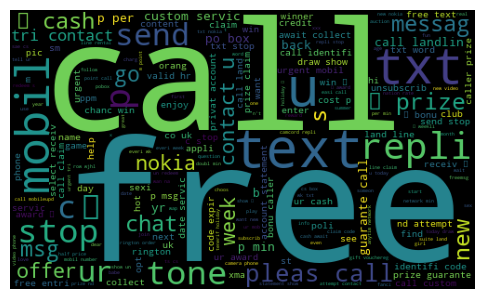

In [18]:
import matplotlib.pyplot as plt

from wordcloud import WordCloud

spam_words_list = df_spam['processed_Message'].astype(str)

spam_words_str = ' '.join(spam_words_list)

spam_wordcloud = WordCloud(width=500, height=300).generate(spam_words_str)

plt.figure(figsize=(6, 4))

plt.imshow(spam_wordcloud)

plt.axis("off")

plt.show()

In [36]:
from sklearn.feature_extraction.text import CountVectorizer 

documents = [
    "My cat and dog sat on the mat",
    "strange cat jumped over the mat",
    "His cat ate the mouse ran across the mat",
    "Her dog run after my cat and mouse",
]

max_features=6

count_vectorizer = CountVectorizer(max_features=max_features)

vectors = count_vectorizer.fit_transform(documents)

print(vectors)

  (0, 4)	1
  (0, 0)	1
  (0, 1)	1
  (0, 5)	1
  (0, 2)	1
  (1, 0)	1
  (1, 5)	1
  (1, 2)	1
  (2, 0)	1
  (2, 5)	2
  (2, 2)	1
  (2, 3)	1
  (3, 4)	1
  (3, 0)	1
  (3, 1)	1
  (3, 3)	1


In [37]:
feature_names = count_vectorizer.get_feature_names_out()

print("Feature Names:")
print(feature_names)

Feature Names:
['cat' 'dog' 'mat' 'mouse' 'my' 'the']


In [38]:
print(vectors.toarray())

[[1 1 1 0 1 1]
 [1 0 1 0 0 1]
 [1 0 1 1 0 2]
 [1 1 0 1 1 0]]


In [39]:
example_df = pd.DataFrame(data=vectors.toarray(),columns=feature_names)

example_df

,cat,dog,mat,mouse,my,the
0,1,1,1,0,1,1
1,1,0,1,0,0,1
2,1,0,1,1,0,2
3,1,1,0,1,1,0


In [40]:
frequencies = vectors.toarray().sum(axis=0)
sorted_indices=frequencies.argsort()[::-1]

In [41]:
 
sorted_feature_names = [feature_names[idx] for idx in sorted_indices]
sorted_frequencies = frequencies[sorted_indices]


for i in range(len(sorted_feature_names)):
    print(sorted_feature_names[i], ": ", sorted_frequencies[i])

the :  4
cat :  4
mat :  3
my :  2
mouse :  2
dog :  2


In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer 

tfidf_vectorizer = TfidfVectorizer(max_features=max_features)
tfidf_vectors = tfidf_vectorizer.fit_transform(documents)

print("\nTF-IDF Vectorization:")

feature_names=tfidf_vectorizer.get_feature_names_out()

example_df = pd.DataFrame(data=tfidf_vectors.toarray(),columns=feature_names)
example_df


TF-IDF Vectorization:


,cat,dog,mat,mouse,my,the
0,0.341846,0.516470,0.418127,0.000000,0.516470,0.418127
1,0.500491,0.000000,0.612172,0.000000,0.000000,0.612172
2,0.304813,0.000000,0.372830,0.460519,0.000000,0.745660
3,0.356966,0.539313,0.000000,0.539313,0.539313,0.000000


In [43]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

corpus = df['processed_Message']


max_features = 100

count_vectorizer = CountVectorizer(max_features=max_features)

vectors = count_vectorizer.fit_transform(corpus)

tfidf_vectorizer = TfidfVectorizer(max_features=max_features)
tfidf_vectors = tfidf_vectorizer.fit_transform(corpus)

In [44]:
from sklearn.model_selection import train_test_split

X = vectors
print(X)

y = df['Spam']

X = X.toarray()
print(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

  (0, 61)	1
  (0, 4)	1
  (1, 17)	1
  (3, 95)	1
  (3, 14)	1
  (4, 68)	2
  (4, 0)	1
  (5, 80)	1
  (6, 27)	1
  (6, 93)	1
  (6, 3)	1
  (6, 38)	1
  (6, 72)	1
  (6, 57)	1
  (6, 70)	1
  (7, 14)	1
  (7, 38)	2
  (8, 18)	1
  (9, 4)	1
  (9, 62)	1
  (9, 7)	2
  (10, 4)	1
  (10, 17)	2
  (10, 48)	3
  (10, 8)	1
  :	:
  (5220, 34)	1
  (5221, 17)	1
  (5221, 70)	1
  (5221, 48)	2
  (5221, 66)	1
  (5221, 86)	1
  (5221, 77)	1
  (5223, 56)	1
  (5223, 21)	1
  (5223, 40)	1
  (5224, 4)	1
  (5224, 11)	1
  (5225, 27)	1
  (5225, 19)	1
  (5225, 52)	1
  (5225, 20)	1
  (5226, 17)	1
  (5226, 48)	1
  (5226, 90)	1
  (5226, 11)	1
  (5226, 97)	1
  (5226, 13)	1
  (5226, 23)	1
  (5226, 1)	1
  (5226, 46)	1
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 1 0 0]]


In [ ]:
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
123/123 [==============================] - 1s 1ms/step - loss: 0.4087 - accuracy: 0.8574
Epoch 2/10
123/123 [==============================] - 0s 993us/step - loss: 0.1638 - accuracy: 0.9492
Epoch 3/10
123/123 [==============================] - 0s 992us/step - loss: 0.1234 - accuracy: 0.9579
Epoch 4/10
123/123 [==============================] - 0s 967us/step - loss: 0.1120 - accuracy: 0.9622
Epoch 5/10
123/123 [==============================] - 0s 964us/step - loss: 0.1045 - accuracy: 0.9635
Epoch 6/10
123/123 [==============================] - 0s 959us/step - loss: 0.0983 - accuracy: 0.9635
Epoch 7/10
123/123 [==============================] - 0s 984us/step - loss: 0.0930 - accuracy: 0.9666
Epoch 8/10
123/123 [==============================] - 0s 959us/step - loss: 0.0870 - accuracy: 0.9724
Epoch 9/10
123/123 [==============================] - 0s 984us/step - loss: 0.0832 - accuracy: 0.9727
Epoch 10/10
123/123 [==============================] - 0s 1ms/step - loss: 0.0789 - 

In [ ]:
import numpy as np

y_pred_prob = model.predict(X_test)
y_pred = np.round(y_pred_prob)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy*100,2))

41/41 [==============================] - 0s 725us/step
Accuracy: 96.86


In [ ]:
from sklearn.model_selection import train_test_split

X = tfidf_vectors

y = df['Spam']

X = X.toarray()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
123/123 [==============================] - 1s 926us/step - loss: 0.4213 - accuracy: 0.8413
Epoch 2/10
123/123 [==============================] - 0s 910us/step - loss: 0.2018 - accuracy: 0.9163
Epoch 3/10
123/123 [==============================] - 0s 910us/step - loss: 0.1389 - accuracy: 0.9533
Epoch 4/10
123/123 [==============================] - 0s 918us/step - loss: 0.1244 - accuracy: 0.9592
Epoch 5/10
123/123 [==============================] - 0s 918us/step - loss: 0.1141 - accuracy: 0.9610
Epoch 6/10
123/123 [==============================] - 0s 910us/step - loss: 0.1100 - accuracy: 0.9638
Epoch 7/10
123/123 [==============================] - 0s 926us/step - loss: 0.1038 - accuracy: 0.9656
Epoch 8/10
123/123 [==============================] - 0s 910us/step - loss: 0.0992 - accuracy: 0.9673
Epoch 9/10
123/123 [==============================] - 0s 918us/step - loss: 0.0947 - accuracy: 0.9679
Epoch 10/10
123/123 [==============================] - 0s 926us/step - loss: 0.089

In [ ]:
import numpy as np

y_pred_prob = model.predict(X_test)
y_pred = np.round(y_pred_prob)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy*100,2))

41/41 [==============================] - 0s 725us/step
Accuracy: 97.02


In [ ]:
message="call to get free prize one million dollars"

processed_message=preprocess_text(message)

vector=tfidf_vectorizer.transform([processed_message])
vector_dense=vector.toarray()

y_pred_prob = model.predict(vector_dense)

y_pred = np.round(y_pred_prob)
print(y_pred)

1/1 [==============================] - 0s 16ms/step
[[1.]]
